In [69]:
from IPython.display import display, HTML
display(HTML("""
<h2>Importing Libraries and Setting Up the Environment</h2>
<p>In this section, we import all the necessary libraries and set up the environment for our project. 
These libraries include TensorFlow and Keras for building and training deep learning models, 
as well as essential libraries for data manipulation, visualization, and preprocessing.</p>
"""))


In [70]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [71]:
display(HTML("""
<h3>Libraries Imported:</h3>
<ul>
    <li><b>os, cv2, numpy, pandas, matplotlib</b> - For general purpose operations, data manipulation, and visualization.</li>
    <li><b>sklearn</b> - For preprocessing and evaluation metrics.</li>
    <li><b>tensorflow.keras</b> - For building and training deep learning models.</li>
</ul>
"""))


In [72]:
display(HTML("""
<h2>Data Loading and Preprocessing</h2>
<p>In this section, we load the ISIC 2018 dataset and preprocess the images. 
Preprocessing steps include resizing the images, normalizing pixel values, 
and optionally visualizing sample images to understand the effects of various preprocessing techniques.</p>
"""))


In [73]:
def load_data(image_dir, label_csv, target_size=(128, 128), visualize=False):
    label_df = pd.read_csv(label_csv)
    label_df.set_index('image', inplace=True)
    images, labels = [], []

    sample_images = np.random.choice(label_df.index, size=5, replace=False) if visualize else []

    for image_name in label_df.index:
        img_path = os.path.join(image_dir, f"{image_name}.jpg")
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)

        if image_name in sample_images and visualize:
            plot_preprocessing_steps(img)

        img = img / 255.0
        images.append(img)
        labels.append(label_df.loc[image_name, 'MEL'])

    images = np.array(images)
    labels = to_categorical(labels)

    if visualize:
        plot_multiple_normalizations(images[:5])

    return images, labels


In [74]:
def plot_preprocessing_steps(img):
    plt.figure(figsize=(15, 3))
    titles = ['Original', 'Min-Max Normalized', 'Z-Score Normalized', 'Flipped', 'Rotated']
    functions = [
        lambda x: x,
        lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)),
        lambda x: (x - np.mean(x)) / np.std(x),
        lambda x: np.fliplr(x),
        lambda x: np.rot90(x)
    ]
    
    for i, func in enumerate(functions):
        transformed_img = func(img)
        plt.subplot(1, 5, i + 1)
        plt.imshow(transformed_img)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


In [75]:
def plot_multiple_normalizations(images):
    # Original
    plt.figure(figsize=(20, 4))
    for i, img in enumerate(images):
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f'Image {i + 1} Original')
        plt.axis('off')
    plt.show()

    # Min-Max Normalization
    plt.figure(figsize=(20, 4))
    for i, img in enumerate(images):
        min_max_normalized_img = (img - np.min(img)) / (np.max(img) - np.min(img))
        plt.subplot(1, 5, i + 1)
        plt.imshow(min_max_normalized_img)
        plt.title(f'Image {i + 1} Min-Max')
        plt.axis('off')
    plt.show()

    # Z-Score Normalization
    plt.figure(figsize=(20, 4))
    for i, img in enumerate(images):
        scaler = StandardScaler()
        img_reshaped = img.reshape(-1, 3)
        z_score_normalized_img = scaler.fit_transform(img_reshaped).reshape(img.shape)
        plt.subplot(1, 5, i + 1)
        plt.imshow(z_score_normalized_img)
        plt.title(f'Image {i + 1} Z-Score')
        plt.axis('off')
    plt.show()

    # Flipped Image
    plt.figure(figsize=(20, 4))
    for i, img in enumerate(images):
        flipped_img = np.fliplr(img)
        plt.subplot(1, 5, i + 1)
        plt.imshow(flipped_img)
        plt.title(f'Image {i + 1} Flipped')
        plt.axis('off')
    plt.show()

    # Rotated Image
    plt.figure(figsize=(20, 4))
    for i, img in enumerate(images):
        rotated_img = np.rot90(img)
        plt.subplot(1, 5, i + 1)
        plt.imshow(rotated_img)
        plt.title(f'Image {i + 1} Rotated')
        plt.axis('off')
    plt.show()


In [76]:
display(HTML("""
<h3>Preprocessing Steps Explained:</h3>
<ul>
    <li><b>Original:</b> The raw image as loaded from the dataset.</li>
    <li><b>Min-Max Normalized:</b> Normalized to the range [0, 1].</li>
    <li><b>Z-Score Normalized:</b> Normalized to have zero mean and unit variance.</li>
    <li><b>Flipped:</b> Horizontally flipped image.</li>
    <li><b>Rotated:</b> Image rotated by 90 degrees.</li>
</ul>
"""))


In [77]:
display(HTML("""
<h2>Loading and Visualizing Data</h2>
<p>In this section, we load the training, validation, and test datasets. 
We also visualize some sample images with various preprocessing techniques applied to understand the data better.</p>
"""))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


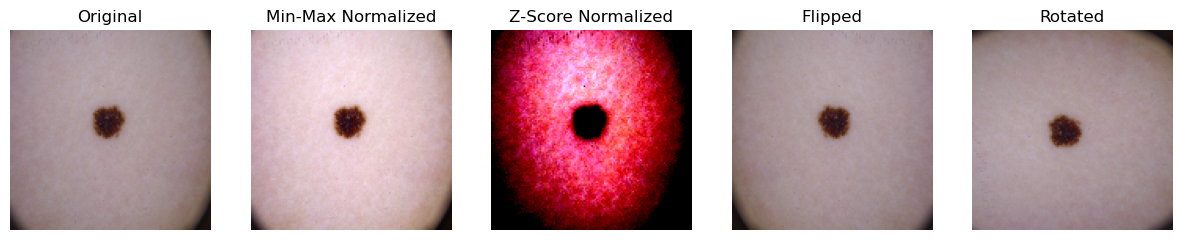

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


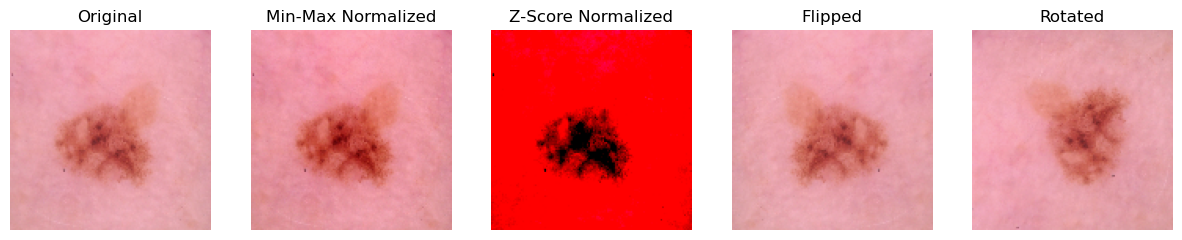

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


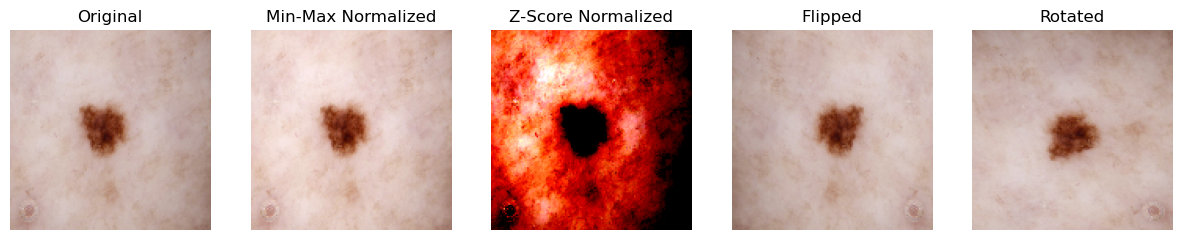

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


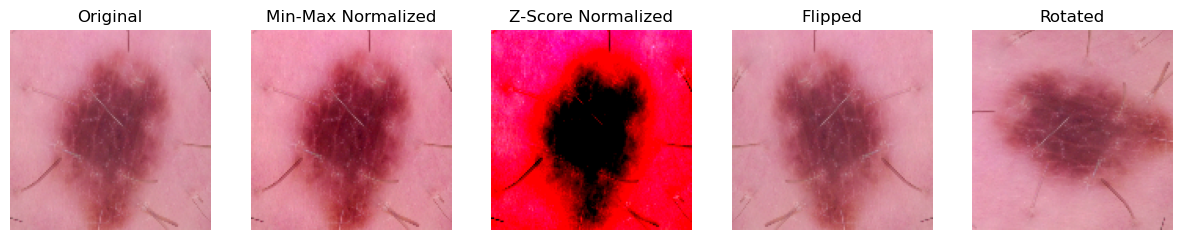

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


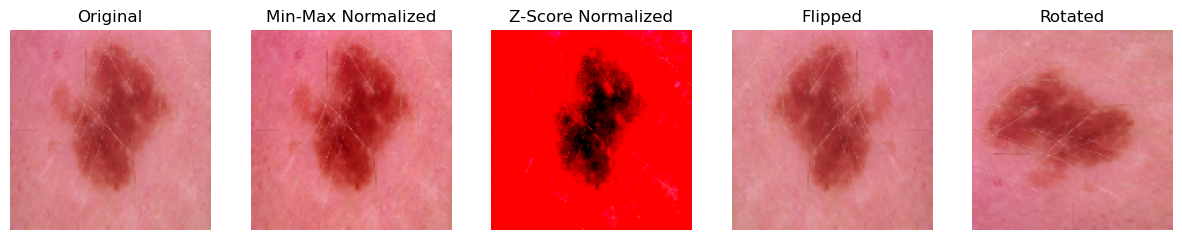

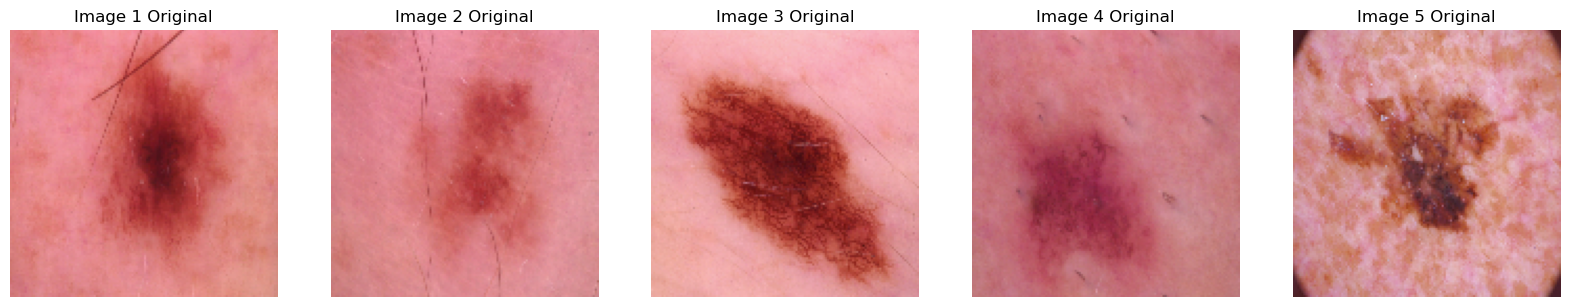

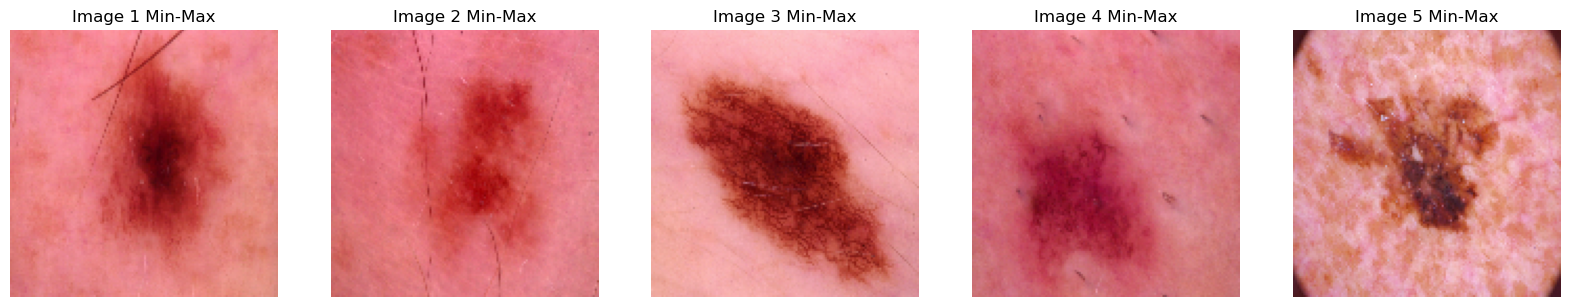

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


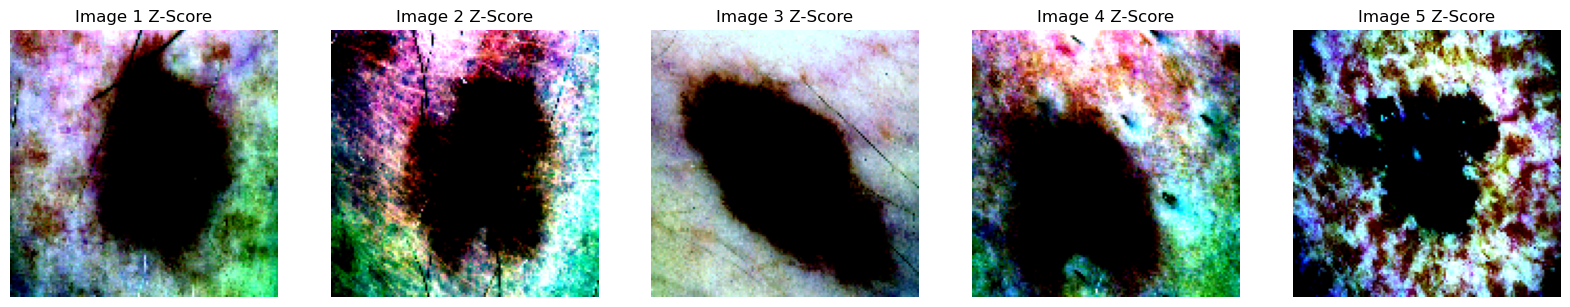

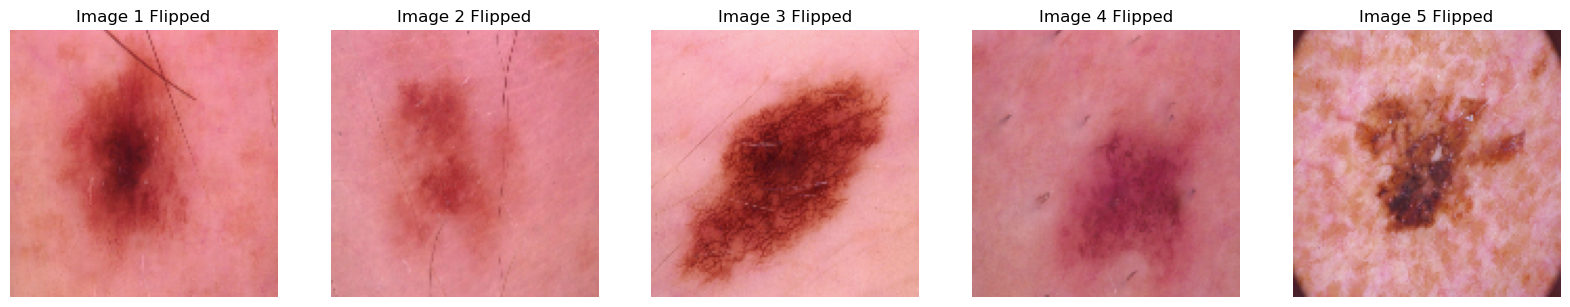

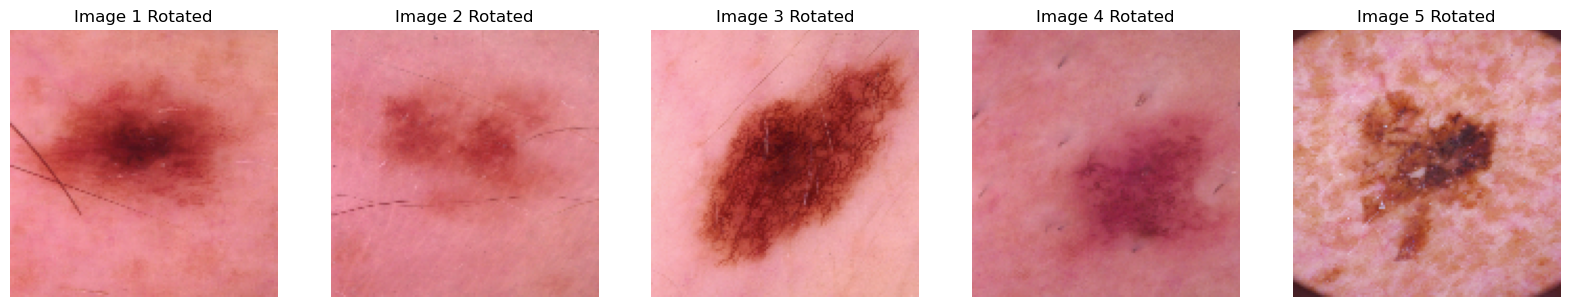

In [78]:
# Load and visualize training data
train_images, train_labels = load_data('ISIC2018_Task3_Training_Input', 'ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth.csv', visualize=True)


In [79]:
# Load validation data
val_images, val_labels = load_data('ISIC2018_Task3_Validation_Input', 'ISIC2018_Task3_Validation_GroundTruth/ISIC2018_Task3_Validation_GroundTruth.csv')
# Load test data
test_images, test_labels = load_data('ISIC2018_Task3_Test_Input', 'ISIC2018_Task3_Test_GroundTruth/ISIC2018_Task3_Test_GroundTruth.csv')


In [80]:
display(HTML("""
<h3>Data Loaded:</h3>
<ul>
    <li><b>Training Data:</b> Loaded and visualized with preprocessing steps.</li>
    <li><b>Validation Data:</b> Loaded without visualization.</li>
    <li><b>Test Data:</b> Loaded without visualization.</li>
</ul>
"""))


In [81]:
display(HTML("""
<h2>Data Augmentation</h2>
<p>In this section, we apply data augmentation techniques to the training images to improve model generalization. 
Data augmentation techniques include random rotations, shifts, shears, zooms, and flips.</p>
"""))


In [82]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)


In [83]:
display(HTML("""
<h3>Data Augmentation Techniques Applied:</h3>
<ul>
    <li><b>Rotation Range:</b> 20 degrees</li>
    <li><b>Width Shift Range:</b> 20%</li>
    <li><b>Height Shift Range:</b> 20%</li>
    <li><b>Shear Range:</b> 20%</li>
    <li><b>Zoom Range:</b> 20%</li>
    <li><b>Horizontal Flip:</b> True</li>
    <li><b>Fill Mode:</b> Nearest</li>
</ul>
"""))


In [84]:
display(HTML("""
<h2>Custom CNN Model</h2>
<p>In this section, we build a custom Convolutional Neural Network (CNN) model. 
The model consists of multiple convolutional layers followed by max-pooling layers and dropout layers to prevent overfitting.</p>
"""))


In [85]:
def build_custom_cnn(input_shape=(128, 128, 3)):
    input_layer = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    return Model(inputs=input_layer, outputs=x)


In [86]:
display(HTML("""
<h3>Custom CNN Model Architecture:</h3>
<ul>
    <li><b>Input Layer:</b> Shape (128, 128, 3)</li>
    <li><b>Conv2D Layers:</b> Three layers with 32, 64, and 128 filters, respectively</li>
    <li><b>MaxPooling2D Layers:</b> Three layers after each Conv2D layer</li>
    <li><b>Dropout Layers:</b> Dropout applied after each MaxPooling2D layer and Dense layer</li>
    <li><b>Dense Layer:</b> Fully connected layer with 512 units</li>
</ul>
"""))


In [87]:
display(HTML("""
<h2>Combined Model</h2>
<p>In this section, we combine pre-trained VGG16 and ResNet50 models with our custom CNN model to build a powerful ensemble model. 
This combined model leverages the strengths of each architecture to improve overall performance.</p>
"""))


In [88]:
def build_combined_model(input_shape=(128, 128, 3)):
    input_layer = Input(shape=input_shape)
    
    # VGG16 Model
    base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model_vgg.layers:
        layer.trainable = False
    vgg_output = base_model_vgg(input_layer)
    vgg_output = GlobalAveragePooling2D()(vgg_output)
    
    # ResNet50 Model
    base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model_resnet.layers:
        layer.trainable = False
    resnet_output = base_model_resnet(input_layer)
    resnet_output = GlobalAveragePooling2D()(resnet_output)

    # Custom CNN
    custom_cnn_model = build_custom_cnn(input_shape)
    custom_cnn_output = custom_cnn_model(input_layer)

    # Combining all models
    combined_output = Concatenate()([vgg_output, resnet_output, custom_cnn_output])
    x = Dense(512, activation='relu')(combined_output)
    x = Dropout(0.5)(x)
    output_layer = Dense(2, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [89]:
model = build_combined_model()
model.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ vgg16 (Functional)            │ (None, 4, 4, 512)         │      14,714,688 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ resnet50 (Functional)         │ (None, 4, 4, 2048)        │      23,587,712 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_6    │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_7    │ (None, 2048)              │               0 │ resnet50[0][0]             │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_13 (Functional)    │ (None, 512)               │      16,870,976 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_3 (Concatenate)   │ (None, 3072)              │               0 │ global_average_pooling2d_… │
│                               │                           │                 │ global_average_pooling2d_… │
│                               │                           │                 │ functional_13[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 512)               │       1,573,376 │ concatenate_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_20 (Dropout)          │ (None, 512)               │               0 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 2)                 │           1,026 │ dropout_20[0][0]           │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 56,747,778 (216.48 MB)

 Trainable params: 18,445,378 (70.36 MB)

 Non-trainable params: 38,302,400 (146.11 MB)

In [90]:
display(HTML("""
<h3>Combined Model Architecture:</h3>
<ul>
    <li><b>VGG16:</b> Pre-trained model with frozen layers</li>
    <li><b>ResNet50:</b> Pre-trained model with frozen layers</li>
    <li><b>Custom CNN:</b> Custom-built convolutional neural network</li>
    <li><b>Concatenation:</b> Combining outputs of VGG16, ResNet50, and custom CNN</li>
    <li><b>Dense Layer:</b> Fully connected layer with 512 units</li>
    <li><b>Output Layer:</b> Softmax activation for binary classification</li>
</ul>
"""))


In [91]:
display(HTML("""
<h2>Model Training with Callbacks</h2>
<p>In this section, we train the combined model using data augmentation and callbacks to save the best model and handle early stopping.</p>
"""))


In [92]:
# Callbacks
callbacks = [
    ModelCheckpoint('best_combined_model.keras', save_best_only=True, monitor='val_accuracy'),
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=5)
]


In [93]:
# Train
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    validation_data=(val_images, val_labels),
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10


C:\Users\traia\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.8811 - loss: 0.3662 - val_accuracy: 0.8912 - val_loss: 0.2947 - learning_rate: 1.0000e-04
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.8833 - loss: 0.3068 - val_accuracy: 0.9067 - val_loss: 0.2947 - learning_rate: 1.0000e-04
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.8884 - loss: 0.2792 - val_accuracy: 0.9016 - val_loss: 0.2559 - learning_rate: 1.0000e-04
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.8907 - loss: 0.2710 - val_accuracy: 0.9119 - val_loss: 0.2579 - learning_rate: 1.0000e-04
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.8931 - loss: 0.2721 - val_accuracy: 0.9016 - val_loss: 0.2773 - learning_rate: 1.0000e-04
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.8923 - loss: 0.2688 - val_accuracy: 0.8808 - val_loss: 0.3038 - learning_rate: 1.0000e-04
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.88

In [94]:
display(HTML("""
<h3>Model Training Progress:</h3>
<p>We monitor the training progress and use callbacks to save the best model and prevent overfitting.</p>
"""))


In [95]:
display(HTML("""
<h2>Evaluation and Visualization</h2>
<p>In this section, we evaluate the trained model on the validation data and visualize the results using ROC curves,
confusion matrices, and classification reports.</p>
"""))


In [96]:
# Evaluate
val_predictions = model.predict(val_images)


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step 


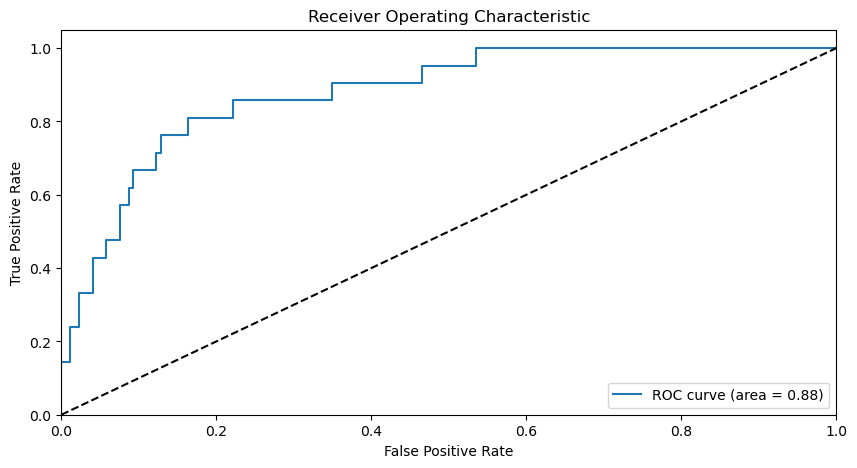

In [97]:
# Plot ROC Curve
def plot_roc_curve(labels, predictions):
    fpr, tpr, _ = roc_curve(labels[:, 1], predictions[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(val_labels, val_predictions)


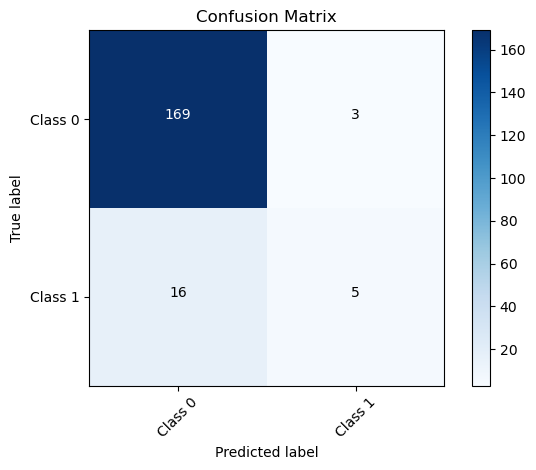

In [98]:
# Plot Confusion Matrix
def plot_confusion_matrix(labels, predictions):
    cm = confusion_matrix(np.argmax(labels, axis=1), np.argmax(predictions, axis=1))
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    classes = ['Class 0', 'Class 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(val_labels, val_predictions)


In [102]:
display(HTML("""
<h3>Evaluation Metrics:</h3>
<ul>
    <li><b>ROC Curve:</b> Visualize the trade-off between sensitivity and specificity.</li>
    <li><b>Confusion Matrix:</b> Visualize the true positives, false positives, true negatives, and false negatives.</li>
</ul>
"""))